## 📥 Data Import & Setup

We begin by importing essential libraries like `pandas`, `numpy`, `matplotlib`, and `seaborn`.  
Then, we load three datasets:  
- `customers.csv`: customer profile data  
- `loans.csv`: loan application details  
- `bureau_data.csv`: historical bureau credit data

We also configure pandas and numpy display settings for better readability.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option("display.float_format", lambda x : '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [2]:
df_customers = pd.read_csv("datasets/customers.csv")
df_loans = pd.read_csv("datasets/loans.csv")
df_bureau = pd.read_csv("datasets/bureau_data.csv")

In [3]:
df_customers.shape,df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


## 🔗 Dataset Merging & Target Column Setup

We merge all three datasets into one using the `cust_id` as the common key:
- First, merge `customers` with `loans`
- Then, merge the result with `bureau_data`

After merging:
- We check the structure using `.info()`
- Convert the `default` column to integer type for modeling
- Use `.value_counts()` to see how many customers defaulted vs. not


In [7]:
df = pd.merge(df_customers,df_loans,on="cust_id")
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df = pd.merge(df,df_bureau,on="cust_id")
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df["default"] = df["default"].astype(int)
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,0,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,0,4,2,120,0,0,5,10


In [11]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

## ⚖️ Handling Imbalanced Data & Avoiding Data Leakage

The `default` target variable is highly imbalanced — only about **8%** of records indicate a default.

To prevent **data leakage**, we split the data **before** doing any analysis or preprocessing:
- 75% for training
- 25% for testing

We'll apply all feature engineering and transformations on the training set first (`df_train`), and then apply the same steps on the test set (`df_test`).


In [12]:
X = df.drop("default",axis=1)
y = df["default"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train,y_train],axis='columns')
df_test = pd.concat([X_test,y_test],axis='columns')

In [13]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

## 🧹 Data Cleaning – Missing & Duplicate Values

### 🔍 Step 1: Check for Missing Values  
We inspect the training data for `NaN` values using `.isna().sum()`.

### 🏠 Step 2: Handle Missing `residence_type`  
The `residence_type` column has missing values.  
We fill them using the **mode** (most frequent category) of the training data:
- Replace missing values in both `df_train` and `df_test` with this mode

### 🧭 Step 3: Check for Duplicates  
Finally, we check for and count any duplicate rows in the training set.


In [14]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [17]:
df_train["residence_type"] = df_train["residence_type"].fillna(mode_residence)
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [18]:
df_test["residence_type"] = df_test["residence_type"].fillna(mode_residence)
df_test.residence_type.unique()

array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [19]:
df_train.duplicated().sum()

np.int64(0)

## 📊 EDA – Cleaning & Exploring Features

### 🔹 Column Selection  
Split features into `numerical_cols` and `categorical_cols` (excluding IDs and dates).

### 📦 Visualize Distributions  
- **Box Plots** to detect outliers  
- **Histograms + KDE** to check spread and skewness

### 💸 Handle Outliers  
Remove rows where `(processing_fee / loan_amount) > 0.03`.

### 🧹 Clean Categories  
Fix typo: `"Personaal"` → `"Personal"` in `loan_purpose`.

### ✅ Sanity Checks  
- `gst ≤ 20% of loan_amount`  
- `sanction_amount ≥ loan_amount`

All values valid.


In [20]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 27434 to 15795
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      37500 non-null  object 
 1   age                          37500 non-null  int64  
 2   gender                       37500 non-null  object 
 3   marital_status               37500 non-null  object 
 4   employment_status            37500 non-null  object 
 5   income                       37500 non-null  int64  
 6   number_of_dependants         37500 non-null  int64  
 7   residence_type               37500 non-null  object 
 8   years_at_current_address     37500 non-null  int64  
 9   city                         37500 non-null  object 
 10  state                        37500 non-null  object 
 11  zipcode                      37500 non-null  int64  
 12  loan_id                      37500 non-null  object 
 13  loan_purpose     

In [22]:
numerical_cols = df_train.select_dtypes(["int64","float64"]).columns.tolist()
numerical_cols.remove("default")
numerical_cols.remove("zipcode")
numerical_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [23]:
categorical_cols = df_train.select_dtypes("object").columns.tolist()
categorical_cols.remove("cust_id")
categorical_cols.remove("loan_id")
categorical_cols.remove("disbursal_date")
categorical_cols.remove("installment_start_dt")
categorical_cols.append("default")
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

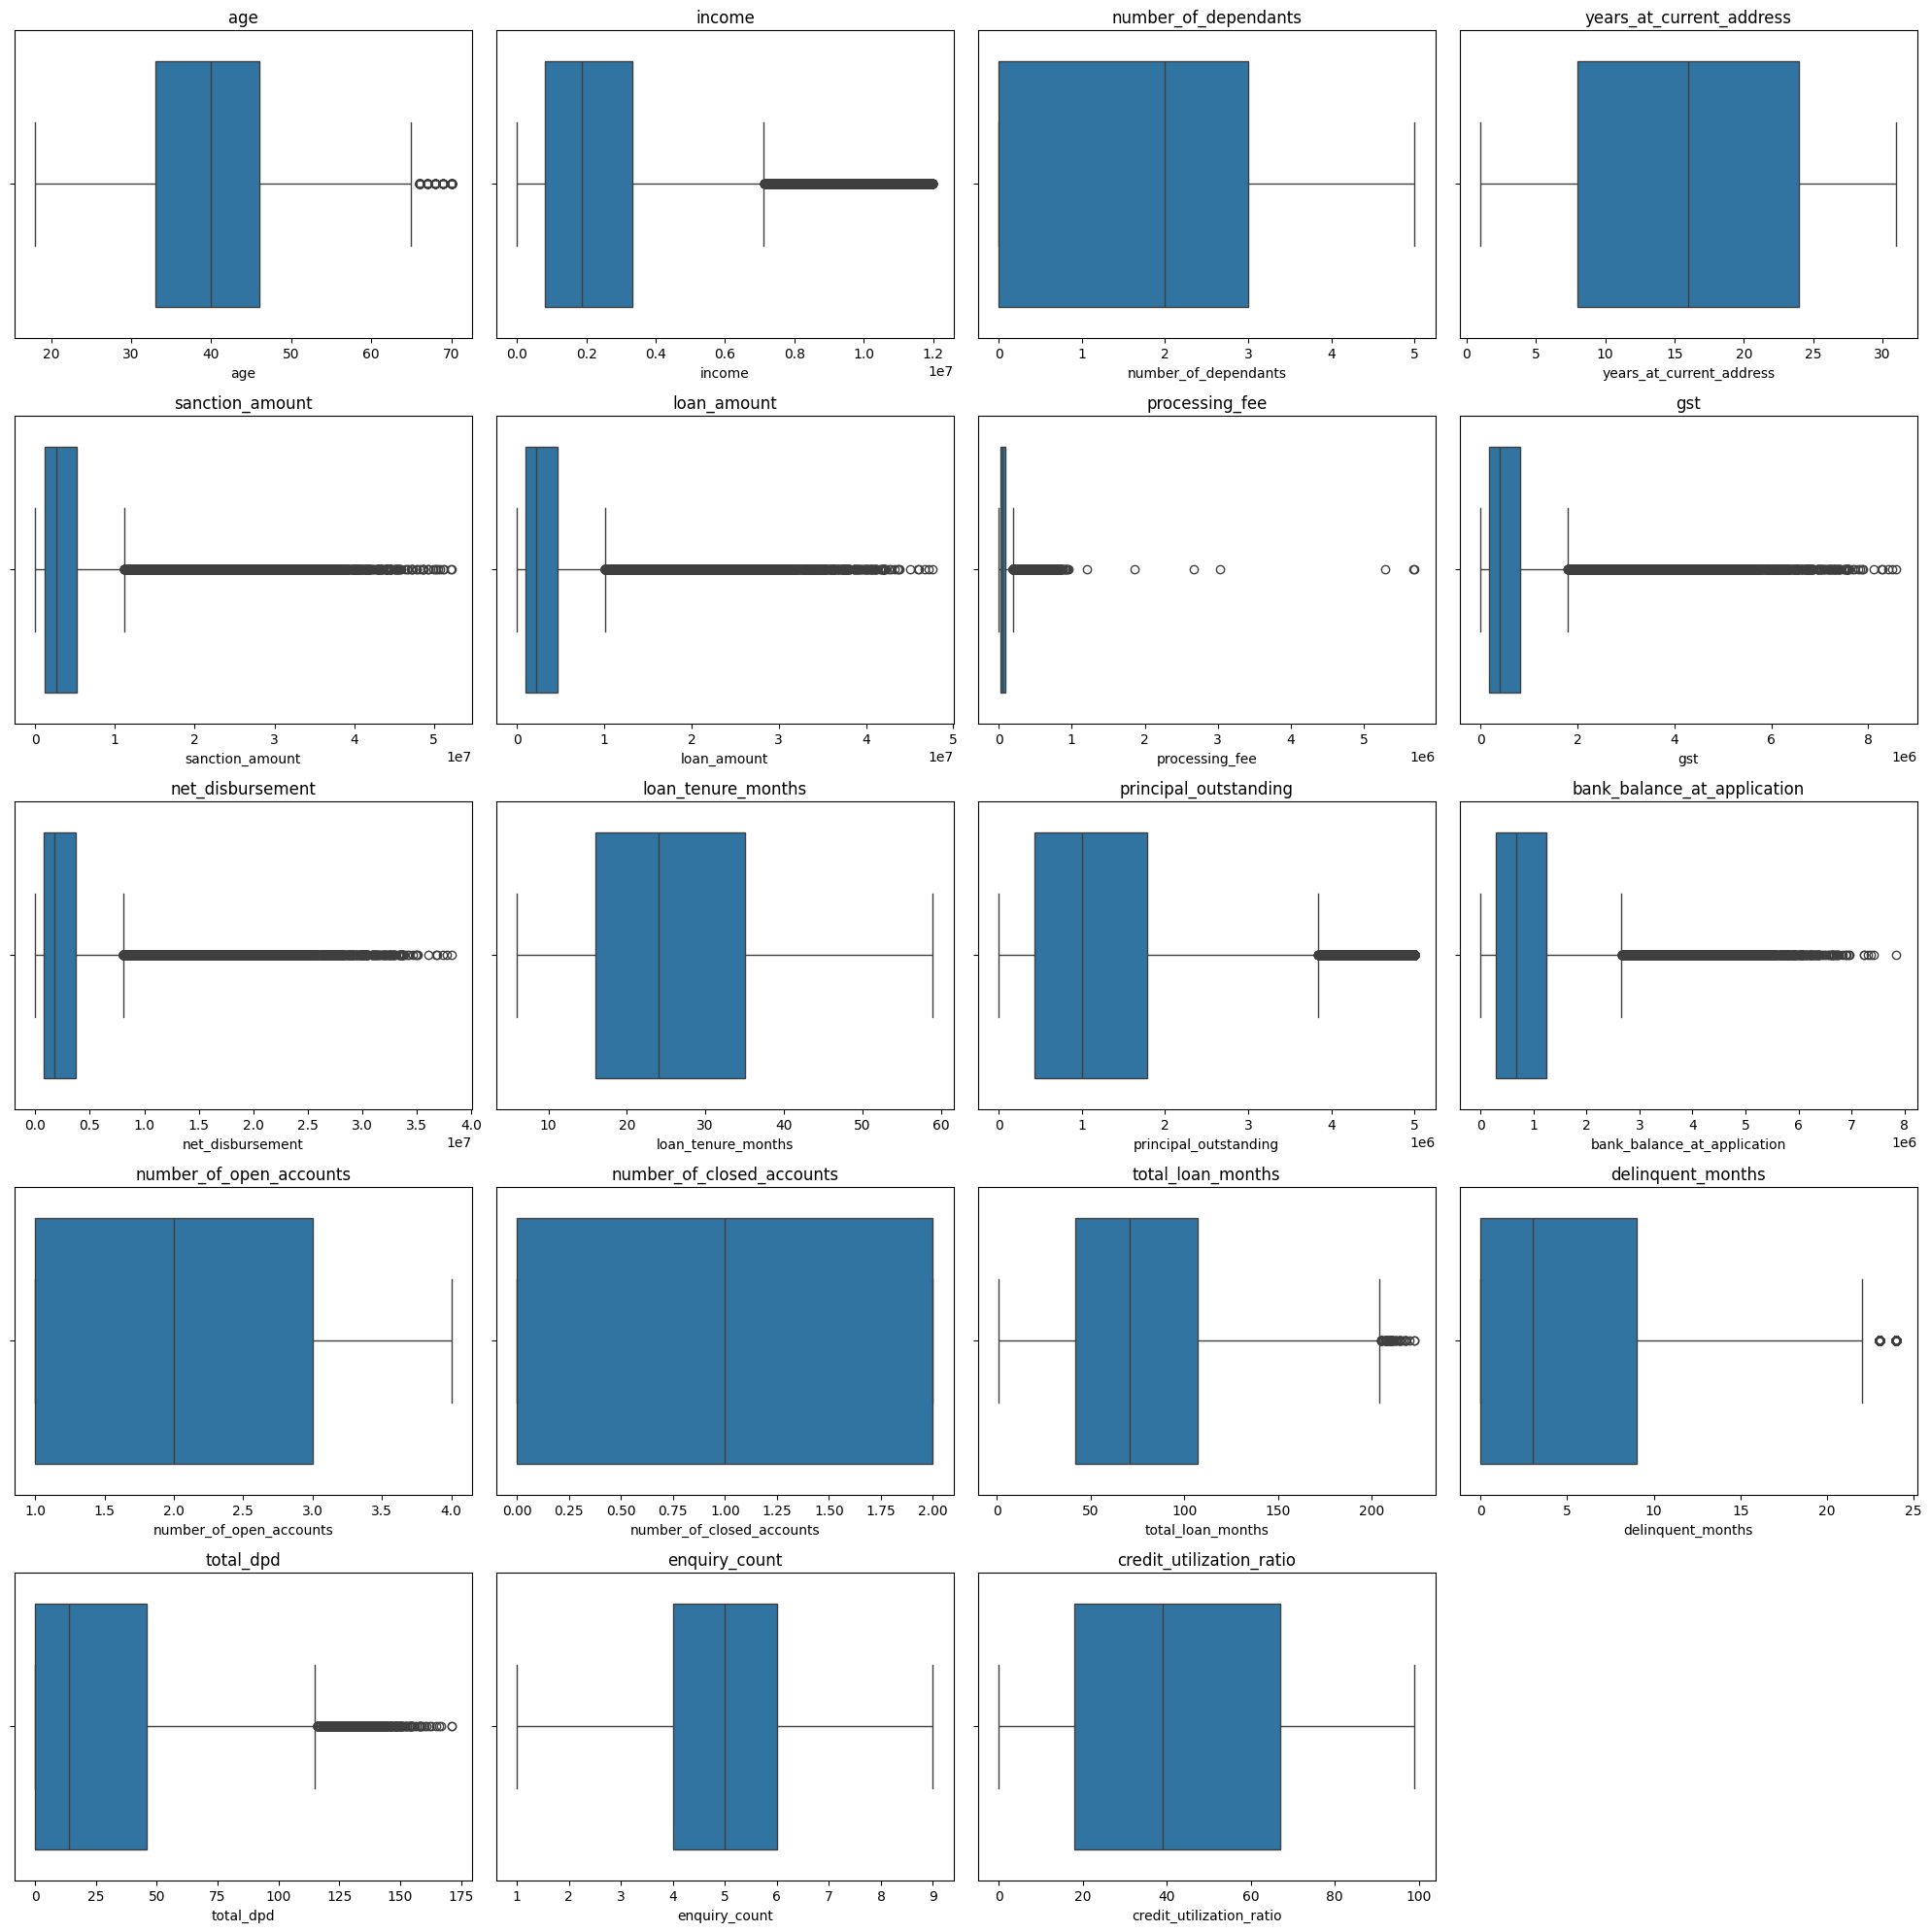

In [24]:
import math


n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


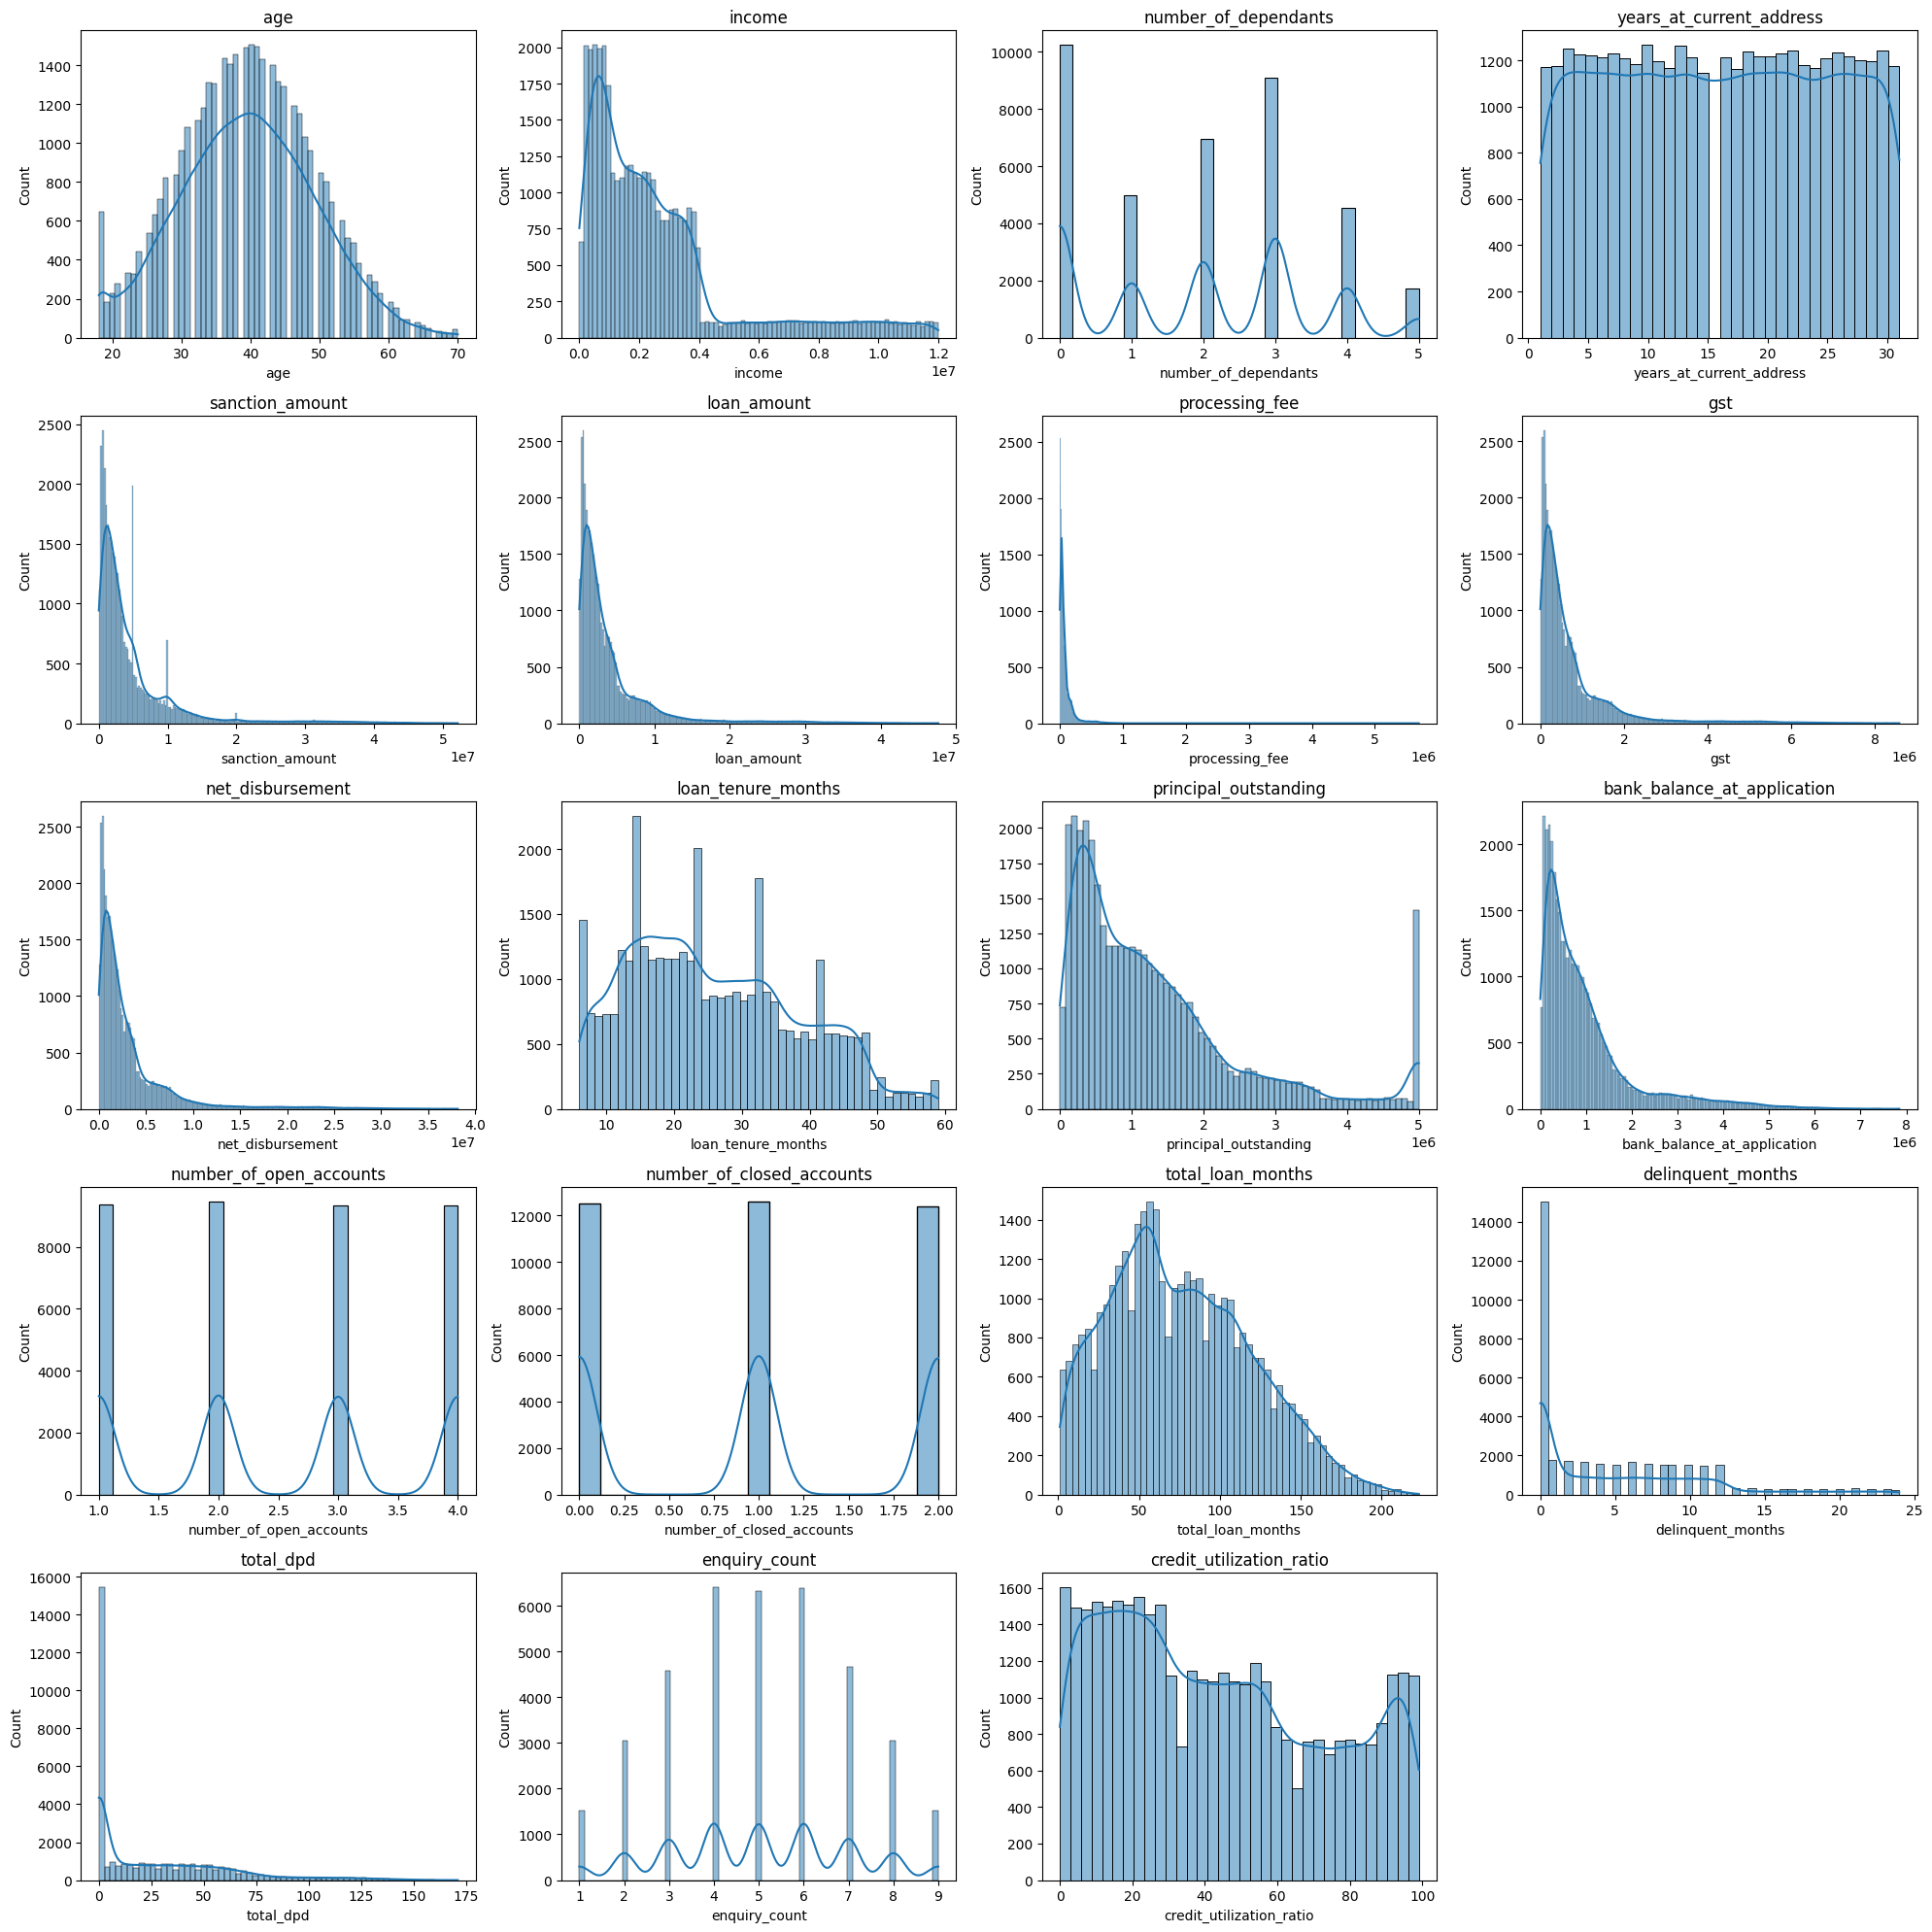

In [25]:
import math


n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df_train[col], kde=True,ax=axes[i])
    axes[i].set_title(col)

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [26]:
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [27]:
df_train[df_train.processing_fee == df_train.processing_fee.max()][["processing_fee","loan_amount"]]


,processing_fee,loan_amount
12294,5698029.90,4639000


In [28]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,2021-12-15,2022-01-14,4,2,154,9,31,6,26,0
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,0
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,2024-04-07,2024-04-15,3,0,112,5,33,3,32,0
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,2022-12-05,2022-12-30,3,1,140,0,0,5,47,0
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,2020-10-15,2020-10-23,1,2,58,0,0,3,86,0
28174,C28175,36,F,Single,Self-Employed,1123000,1,Rented,31,Hyderabad,...,2022-05-18,2022-06-05,3,0,111,8,41,3,62,0
29305,C29306,52,M,Married,Self-Employed,3839000,2,Owned,11,Delhi,...,2022-06-28,2022-07-21,2,2,42,11,65,3,2,0


In [29]:
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()
df_train_1.shape

(37487, 33)

In [30]:
df_train_1[(df_train.processing_fee/df_train.loan_amount)>0.03]

C:\Users\msart\AppData\Local\Temp\ipykernel_30028\2186988143.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_1[(df_train.processing_fee/df_train.loan_amount)>0.03]


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [31]:
df_test_1 = df_test[(df_test.processing_fee/df_test.loan_amount)<0.03].copy()
df_test_1.shape

(12498, 33)

In [32]:
for col in categorical_cols :
    print(col,"--",df_train_1[col].unique())

gender -- ['F' 'M']
marital_status -- ['Single' 'Married']
employment_status -- ['Salaried' 'Self-Employed']
residence_type -- ['Owned' 'Mortgage' 'Rented']
city -- ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state -- ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
loan_purpose -- ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type -- ['Secured' 'Unsecured']
default -- [0 1]


In [33]:
df_train_1["loan_purpose"] = df_train_1["loan_purpose"].replace("Personaal", "Personal")
df_train_1["loan_purpose"].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [34]:
df_test_1["loan_purpose"] = df_test_1["loan_purpose"].replace("Personaal", "Personal")
df_test_1["loan_purpose"].unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

In [35]:
df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [36]:
df_test_1[(df_test_1.gst/df_test_1.loan_amount)>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [37]:
df_train_1[(df_train_1.sanction_amount<df_train_1.loan_amount)]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [38]:
df_test_1[(df_test_1.sanction_amount<df_test_1.loan_amount)]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [39]:
# there are no outlier in both 

## 📈 KDE Plots – Distribution by Default Status

We use Kernel Density Estimation (KDE) to compare the distribution of numerical features for defaulters vs. non-defaulters.

### 🔍 Insights:
- For example, the `age` plot shows that **younger applicants** (orange curve) are slightly more likely to default than older ones (blue curve).
- This pattern is replicated across all numerical columns to spot similar trends.

KDE plots help visually separate risky vs. safe borrower profiles.


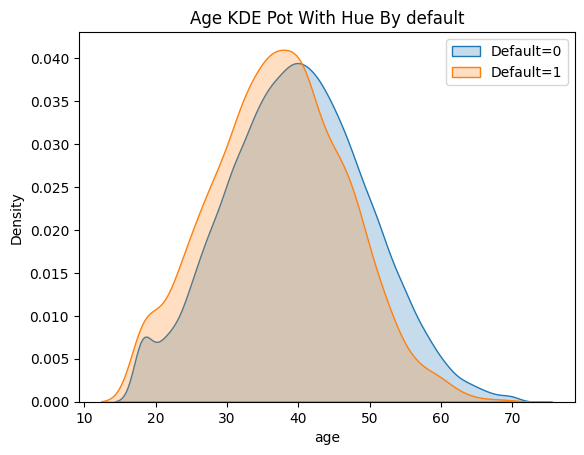

In [40]:
sns.kdeplot(df_train_1[df_train_1.default==0]["age"],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["age"],fill=True,label="Default=1")
plt.title("Age KDE Pot With Hue By default")
plt.legend()
plt.show()

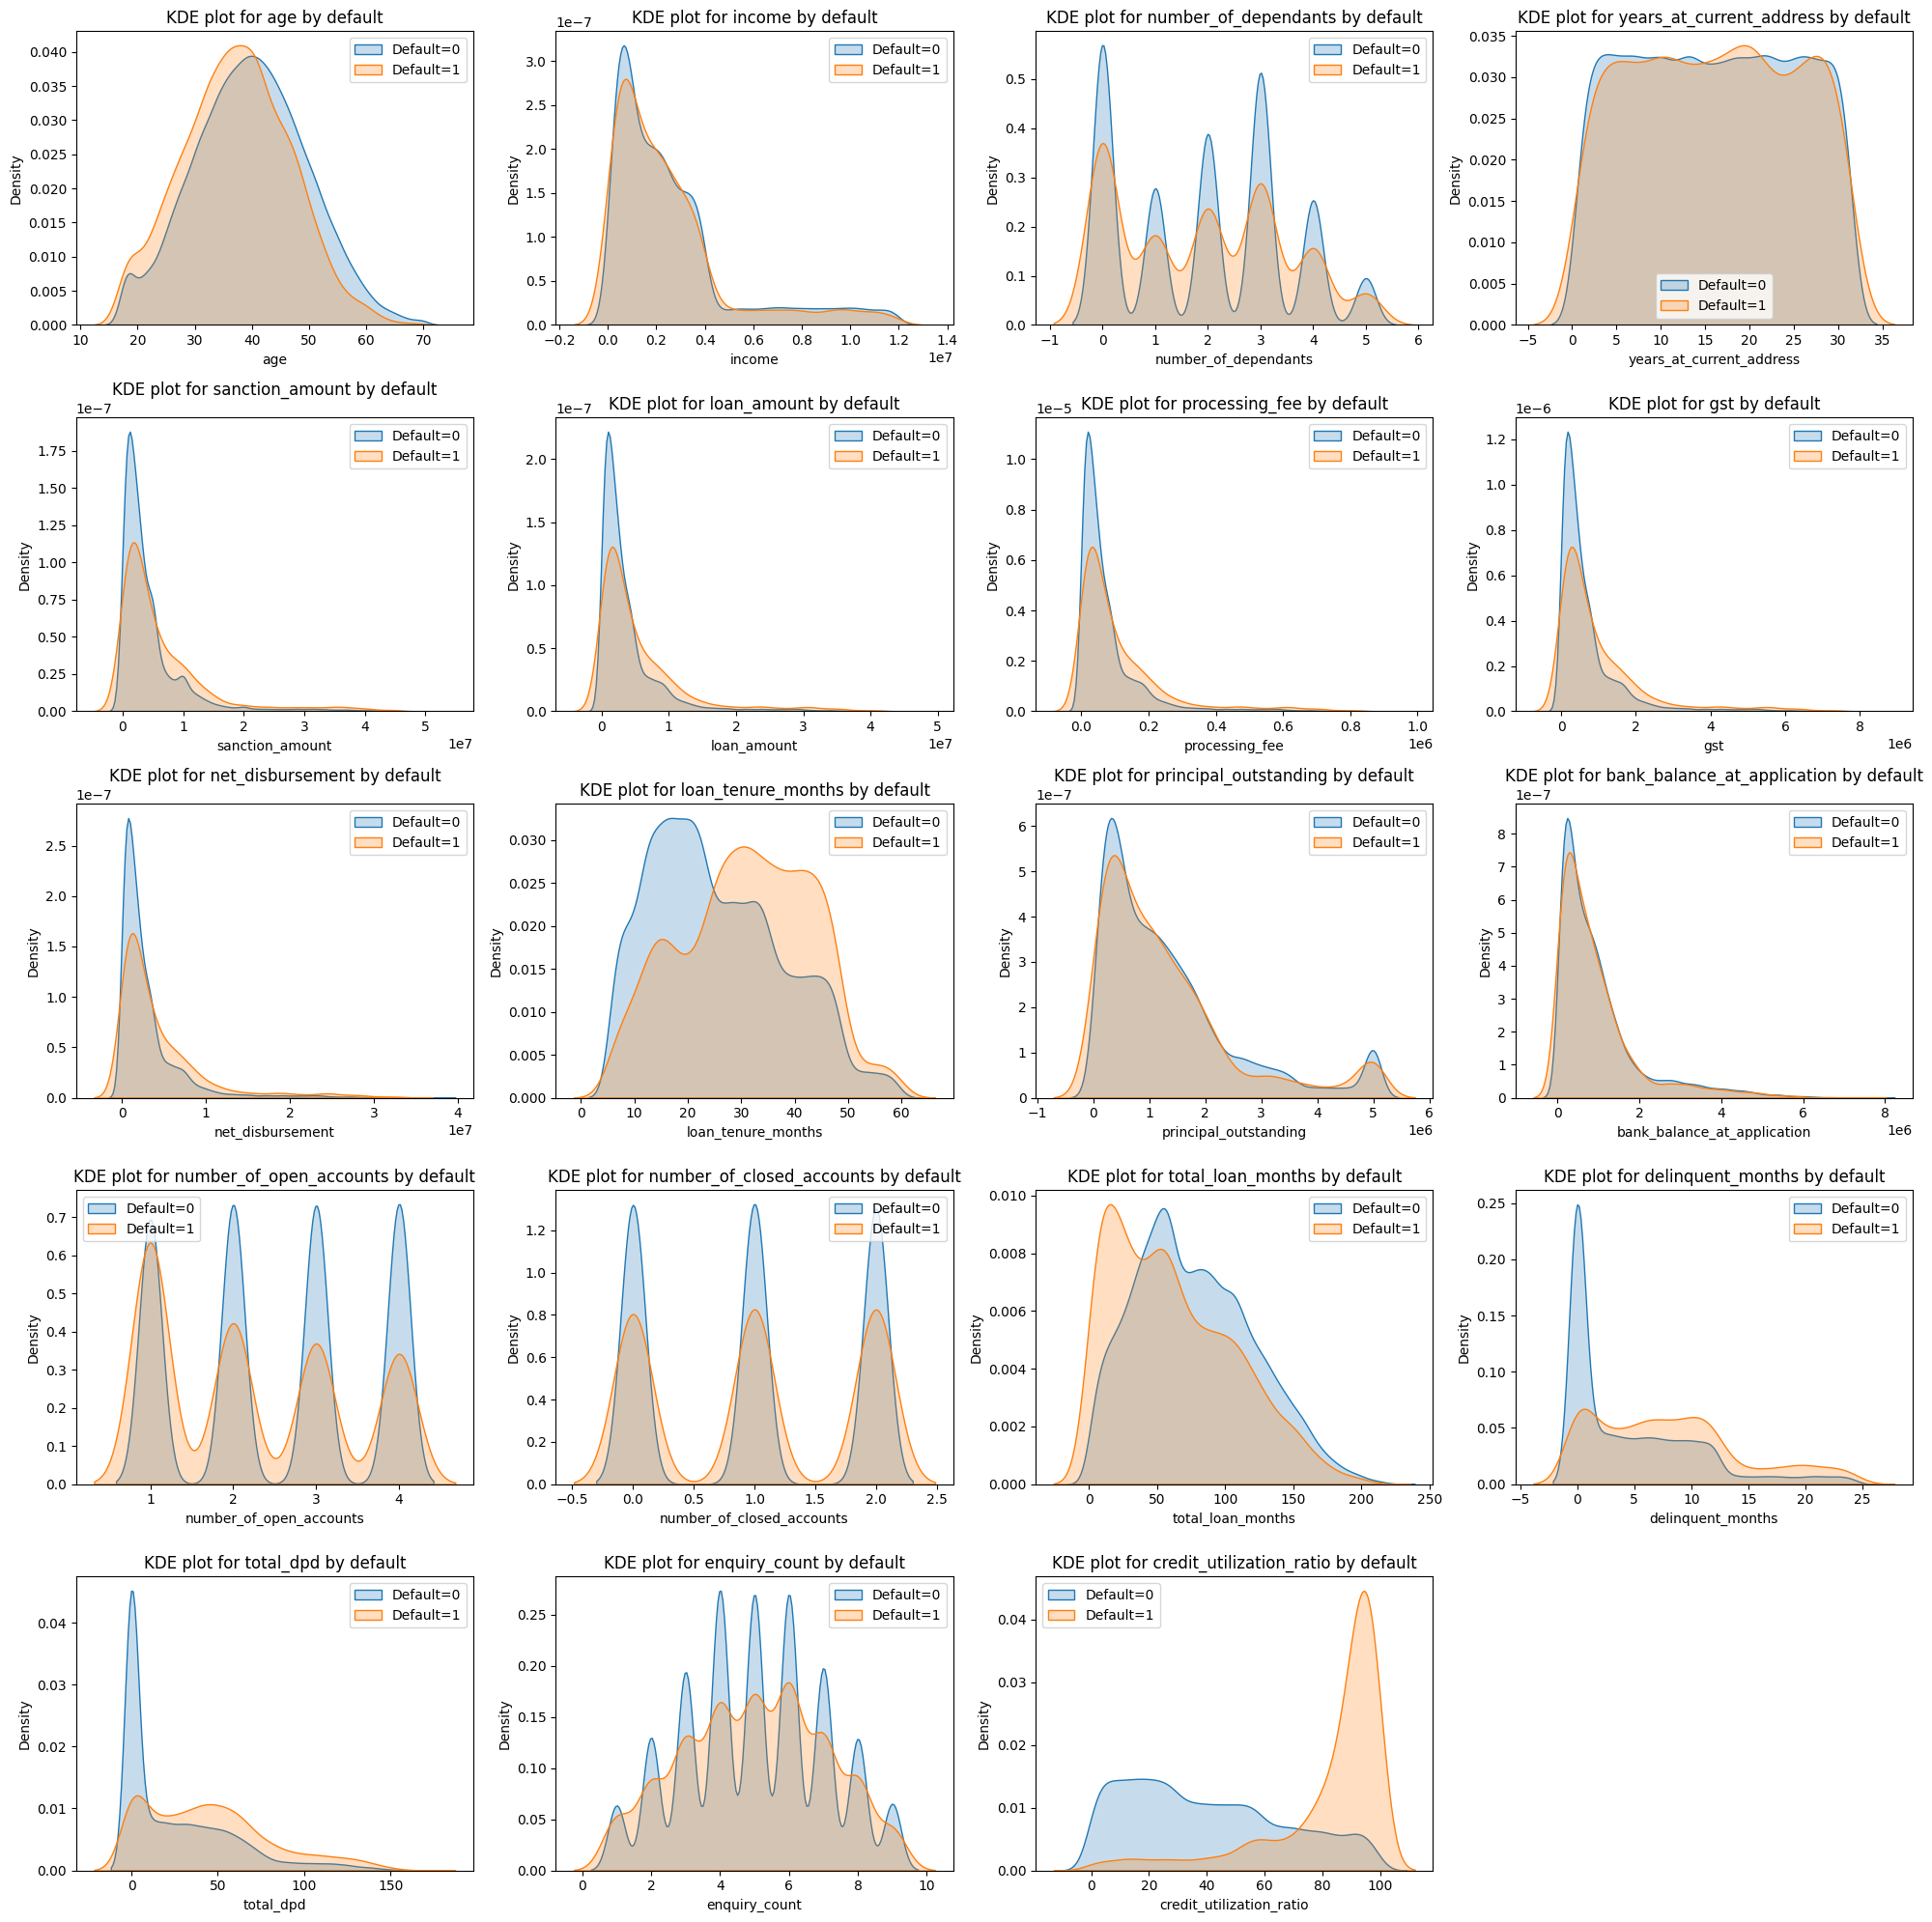

In [41]:
n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.kdeplot(data=df_train_1[df_train_1.default == 0], x=col, fill=True, label="Default=0", ax=ax)
    sns.kdeplot(data=df_train_1[df_train_1.default == 1], x=col, fill=True, label="Default=1", ax=ax)
    ax.set_title(f"KDE plot for {col} by default")
    ax.legend()

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## 📊 KDE Plot Insights by Loan Default Status

### 1. Age
- Borrowers who defaulted are slightly **younger** on average compared to those who didn’t.

### 2. Income
- Defaulters show a **lower income density** overall, indicating a correlation between **low income and higher default risk**.

### 3. Number of Dependents
- Defaulters tend to have **more dependents**, suggesting potential financial stress.

### 4. Years at Current Address
- No significant difference between the two groups. Stability at current address may not be a strong predictor.

### 5. Sanctioned Amount vs Loan Amount
- Both show similar shapes, but **defaulters peak at lower amounts**, suggesting risk increases with lower sanctioned or loan amounts.

### 6. Processing Fee
- Slightly higher processing fees for defaulters.

### 7. Net Disbursement Amount
- Defaulters generally receive **lower disbursement amounts**.

### 8. Loan Tenure (Months)
- **Longer tenures** seem more common among defaulters, possibly due to lower monthly installments.

### 9. Principal Outstanding
- Defaulters have more outstanding amounts in certain ranges.

### 10. Bank Balance at Application
- Lower bank balances are **more frequent among defaulters**.

### 11. Open and Closed Accounts
- Defaulters tend to have a **higher number of open accounts**.

### 12. Total Loan Months
- Mixed pattern, but defaulters are more concentrated around certain periods.

### 13. Delinquent Months
- Expectedly higher for defaulters, **confirming their repayment issues**.

### 14. Total Spd and Enquiry Count
- Higher enquiry counts and spd among defaulters, indicating **higher credit-seeking behavior**.

### 15. Credit Utilization Ratio
- **Significantly higher** for defaulters, which is a **strong risk signal**.

---

✅ These insights can help prioritize features for modeling and risk analysis.


---
## 🧠 Feature Engineering & KDE Analysis

We create 3 important features to better capture credit risk behavior:

1. **Loan-to-Income Ratio** – Measures affordability  
2. **Delinquency Ratio (%)** – Time spent delinquent during loan  
3. **Avg DPD per Delinquency** – Severity of delays

📊 KDE plots show that **defaulters consistently have higher values** across all three features.


In [42]:
df_train_1["loan_to_income"] = round(df_train_1["loan_amount"] / df_train_1["income"],2)
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-05-21,4,2,90,6,33,8,59,0,2.90
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-12-11,3,1,119,4,17,4,92,0,1.08
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-09-19,2,1,83,14,78,4,83,0,0.66
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-05-05,1,1,37,0,0,5,34,0,1.10
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-02-17,2,0,62,6,28,5,19,0,1.84


In [43]:
df_test_1["loan_to_income"] = round(df_test_1["loan_amount"] / df_test_1["income"],2)
df_test_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2022-12-21,2,2,70,3,27,5,12,0,1.40
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,2020-07-15,4,0,115,0,0,9,85,0,3.24
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,2019-08-02,4,1,144,0,0,4,72,0,3.01
12447,C12448,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,...,2020-10-31,3,2,93,0,0,4,90,0,1.10
39489,C39490,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,...,2023-08-02,4,2,152,20,105,9,53,0,1.02


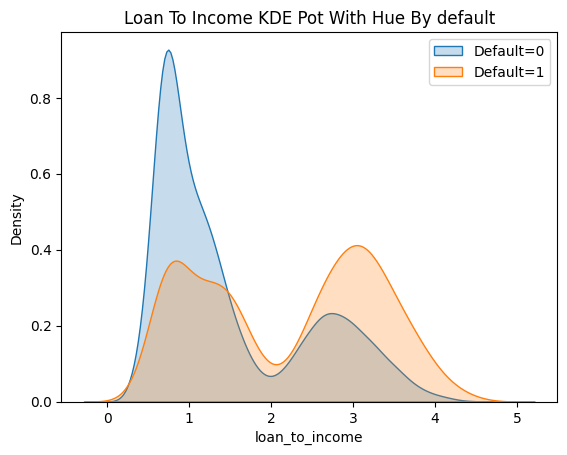

In [44]:
sns.kdeplot(df_train_1[df_train_1.default==0]["loan_to_income"],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["loan_to_income"],fill=True,label="Default=1")
plt.title("Loan To Income KDE Pot With Hue By default")
plt.legend()
plt.show()

In [45]:
df_train_1[["delinquent_months","total_loan_months"]]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [46]:
df_train_1["delinquent_months_to_loan_months"] = df_train_1["delinquent_months"]*100 / df_train_1["total_loan_months"].round(1)
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquent_months_to_loan_months
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,4,2,90,6,33,8,59,0,2.90,6.67
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,3,1,119,4,17,4,92,0,1.08,3.36
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2,1,83,14,78,4,83,0,0.66,16.87
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,1,1,37,0,0,5,34,0,1.10,0.00
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2,0,62,6,28,5,19,0,1.84,9.68


In [47]:
df_test_1["delinquent_months_to_loan_months"] = df_test_1["delinquent_months"]*100 / df_test_1["total_loan_months"].round(1)
df_test_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquent_months_to_loan_months
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2,2,70,3,27,5,12,0,1.40,4.29
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,4,0,115,0,0,9,85,0,3.24,0.00
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,4,1,144,0,0,4,72,0,3.01,0.00
12447,C12448,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,...,3,2,93,0,0,4,90,0,1.10,0.00
39489,C39490,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,...,4,2,152,20,105,9,53,0,1.02,13.16


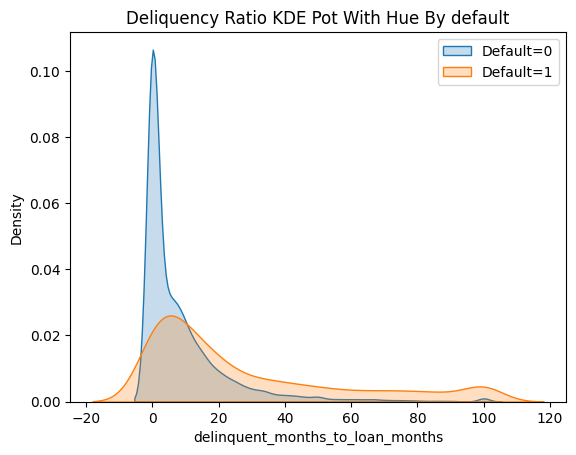

In [48]:
sns.kdeplot(df_train_1[df_train_1.default==0]["delinquent_months_to_loan_months"],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["delinquent_months_to_loan_months"],fill=True,label="Default=1")
plt.title("Deliquency Ratio KDE Pot With Hue By default")
plt.legend()
plt.show()

In [49]:
df_train_1[["delinquent_months","total_dpd"]]

,delinquent_months,total_dpd
27434,6,33
13400,4,17
883,14,78
7303,0,0
45124,6,28
...,...,...
11284,23,126
44732,0,0
38158,0,0
860,5,24


In [50]:
df_train_1["avg_dpd_per_deliquency"] = np.where(
    df_train_1["delinquent_months"] != 0 
    ,df_train_1["total_dpd"] / df_train_1["delinquent_months"].round(1),
    0
)
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2,90,6,33,8,59,0,2.90,6.67,5.50
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,1,119,4,17,4,92,0,1.08,3.36,4.25
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,1,83,14,78,4,83,0,0.66,16.87,5.57
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,1,37,0,0,5,34,0,1.10,0.00,0.00
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,0,62,6,28,5,19,0,1.84,9.68,4.67


In [51]:
df_test_1["avg_dpd_per_deliquency"] = np.where(
    df_test_1["delinquent_months"] != 0 
    ,df_test_1["total_dpd"] / df_test_1["delinquent_months"].round(1),
    0
)
df_test_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2,70,3,27,5,12,0,1.40,4.29,9.00
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,0,115,0,0,9,85,0,3.24,0.00,0.00
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,1,144,0,0,4,72,0,3.01,0.00,0.00
12447,C12448,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,...,2,93,0,0,4,90,0,1.10,0.00,0.00
39489,C39490,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,...,2,152,20,105,9,53,0,1.02,13.16,5.25


In [52]:
df_train_1["avg_dpd_per_deliquency"].isna().sum(),df_test_1["avg_dpd_per_deliquency"].isna().sum()

(np.int64(0), np.int64(0))

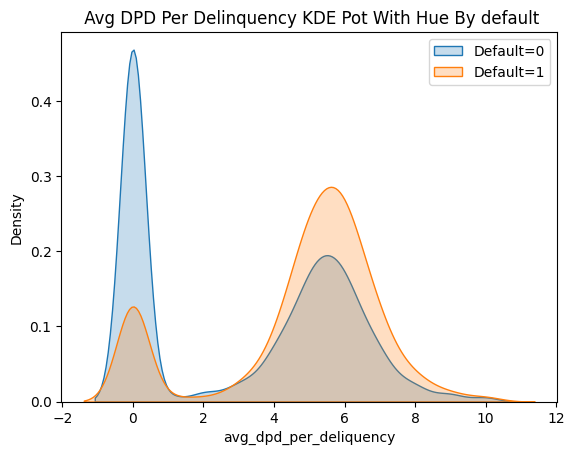

In [53]:
sns.kdeplot(df_train_1[df_train_1.default==0]["avg_dpd_per_deliquency"],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["avg_dpd_per_deliquency"],fill=True,label="Default=1")
plt.title(" Avg DPD Per Delinquency KDE Pot With Hue By default")
plt.legend()
plt.show()

## 🧮 Feature Selection & Multicollinearity Handling

We refine the dataset by:

### 🔹 Step 1: Drop Unnecessary Columns  
- Remove identifiers (`cust_id`, `loan_id`) and raw date/amount features after engineering new ones.

### 📏 Step 2: Feature Scaling  
- Use **MinMaxScaler** to normalize numerical columns (excluding `zipcode` and target).
- Fit on training data and apply to test data.

### 🔍 Step 3: Multicollinearity Check with VIF  
- Calculate VIF (Variance Inflation Factor) to detect highly correlated features.
- Drop high-VIF columns like `sanction_amount`, `processing_fee`, etc., to improve model stability.


In [54]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_months_to_loan_months',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [55]:
df_train_2=df_train_1.drop(['cust_id','loan_id'],axis=1)
df_test_2=df_test_1.drop(['cust_id','loan_id'],axis=1)
display(df_train_2.head())
display(df_test_2.head())

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
27434,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,Gujarat,...,2,90,6,33,8,59,0,2.90,6.67,5.50
13400,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,Delhi,...,1,119,4,17,4,92,0,1.08,3.36,4.25
883,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,Uttar Pradesh,...,1,83,14,78,4,83,0,0.66,16.87,5.57
7303,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,Karnataka,...,1,37,0,0,5,34,0,1.10,0.00,0.00
45124,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,Rajasthan,...,0,62,6,28,5,19,0,1.84,9.68,4.67


,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
33553,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,Telangana,...,2,70,3,27,5,12,0,1.40,4.29,9.00
9427,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,Rajasthan,...,0,115,0,0,9,85,0,3.24,0.00,0.00
199,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,Delhi,...,1,144,0,0,4,72,0,3.01,0.00,0.00
12447,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,Delhi,...,2,93,0,0,4,90,0,1.10,0.00,0.00
39489,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,Maharashtra,...,2,152,20,105,9,53,0,1.02,13.16,5.25


In [56]:
df_train_2.columns

Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_months_to_loan_months', 'avg_dpd_per_deliquency'],
      dtype='object')

In [57]:
df_train_3=df_train_2.drop(['disbursal_date', 'installment_start_dt', 'income','loan_amount','total_loan_months','delinquent_months','total_dpd'],axis=1)
df_test_3=df_test_2.drop(['disbursal_date', 'installment_start_dt','income','loan_amount','total_loan_months','delinquent_months','total_dpd'],axis=1)
display(df_train_2.head())
display(df_test_2.head())

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
27434,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,Gujarat,...,2,90,6,33,8,59,0,2.90,6.67,5.50
13400,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,Delhi,...,1,119,4,17,4,92,0,1.08,3.36,4.25
883,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,Uttar Pradesh,...,1,83,14,78,4,83,0,0.66,16.87,5.57
7303,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,Karnataka,...,1,37,0,0,5,34,0,1.10,0.00,0.00
45124,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,Rajasthan,...,0,62,6,28,5,19,0,1.84,9.68,4.67


,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
33553,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,Telangana,...,2,70,3,27,5,12,0,1.40,4.29,9.00
9427,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,Rajasthan,...,0,115,0,0,9,85,0,3.24,0.00,0.00
199,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,Delhi,...,1,144,0,0,4,72,0,3.01,0.00,0.00
12447,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,Delhi,...,2,93,0,0,4,90,0,1.10,0.00,0.00
39489,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,Maharashtra,...,2,152,20,105,9,53,0,1.02,13.16,5.25


In [58]:
df_test_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_months_to_loan_months', 'avg_dpd_per_deliquency'],
      dtype='object')

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_cols = df_train_3.select_dtypes(["int64","float64"]).columns.tolist()
numerical_cols

['age',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'default',
 'loan_to_income',
 'delinquent_months_to_loan_months',
 'avg_dpd_per_deliquency']

In [60]:
X_train= df_train_3.drop("default",axis=1)
y_train = df_train_3["default"]
cols_to_scale = df_train_3.select_dtypes(["int64","float64"]).columns.tolist()
cols_to_scale.remove("default")
cols_to_scale.remove("zipcode")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
27434,0.52,F,Single,Salaried,0.00,Owned,0.13,Ahmedabad,Gujarat,380001,...,0.34,0.18,0.07,1.00,1.00,0.88,0.60,0.61,0.07,0.55
13400,0.21,M,Single,Salaried,0.00,Owned,0.80,Delhi,Delhi,110001,...,0.51,0.20,0.12,0.67,0.50,0.38,0.93,0.18,0.03,0.43
883,0.62,F,Single,Self-Employed,0.00,Mortgage,0.93,Lucknow,Uttar Pradesh,226001,...,0.25,0.27,0.10,0.33,0.50,0.38,0.84,0.08,0.17,0.56
7303,0.48,F,Single,Self-Employed,0.20,Owned,0.87,Bangalore,Karnataka,560001,...,0.28,0.03,0.01,0.00,0.50,0.50,0.34,0.19,0.00,0.00
45124,0.25,F,Single,Salaried,0.00,Owned,0.87,Jaipur,Rajasthan,302001,...,0.74,0.01,0.01,0.33,0.00,0.50,0.19,0.36,0.10,0.47


In [61]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,418763.45,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,168837.51,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,400001.00,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,700001.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [62]:
X_test= df_test_3.drop("default",axis=1)
y_test = df_test_3["default"]
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head()


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
33553,0.35,F,Married,Self-Employed,0.60,Owned,0.47,Hyderabad,Telangana,500001,...,0.53,0.30,0.23,0.33,1.00,0.50,0.12,0.26,0.04,0.90
9427,0.29,F,Single,Salaried,0.00,Owned,0.47,Jaipur,Rajasthan,302001,...,0.62,0.27,0.10,1.00,0.00,1.00,0.86,0.69,0.00,0.00
199,0.19,M,Single,Self-Employed,0.00,Owned,0.60,Delhi,Delhi,110001,...,0.62,0.10,0.04,1.00,0.50,0.38,0.73,0.63,0.00,0.00
12447,0.19,M,Married,Salaried,0.60,Rented,0.10,Delhi,Delhi,110001,...,0.19,0.12,0.04,0.67,1.00,0.38,0.91,0.19,0.00,0.00
39489,0.65,M,Married,Self-Employed,0.40,Owned,0.83,Pune,Maharashtra,411001,...,0.38,0.29,0.06,1.00,1.00,1.00,0.54,0.17,0.13,0.53


In [63]:
def calculate_vif_score(df) :
    vif_df = pd.DataFrame()
    vif_df["columns"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif_df

In [64]:
calculate_vif_score(X_train[cols_to_scale])

C:\Users\msart\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,columns,VIF
0,age,5.58
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,102.15
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.13
8,principal_outstanding,16.27
9,bank_balance_at_application,9.27


In [65]:
features_to_drop = ["sanction_amount","processing_fee","gst","net_disbursement","principal_outstanding"]
X_train_1 = X_train.drop(features_to_drop,axis=1)

In [66]:
X_test_1 = X_test.drop(features_to_drop,axis=1)

In [67]:
numerical_cols = X_train_1.select_dtypes(["int64","float64"]).columns.tolist()
vif_df=calculate_vif_score(X_train_1[numerical_cols])
vif_df

,columns,VIF
0,age,5.55
1,number_of_dependants,2.73
2,years_at_current_address,3.45
3,zipcode,5.60
4,loan_tenure_months,5.99
5,bank_balance_at_application,1.81
6,number_of_open_accounts,4.33
7,number_of_closed_accounts,2.37
8,enquiry_count,6.42
9,credit_utilization_ratio,2.94


In [68]:
selected_numeric_vif_features_vif = vif_df["columns"].astype(str).tolist()
selected_numeric_vif_features_vif

['age',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'loan_tenure_months',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_months_to_loan_months',
 'avg_dpd_per_deliquency']

In [69]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_months_to_loan_months', 'avg_dpd_per_deliquency'],
      dtype='object')

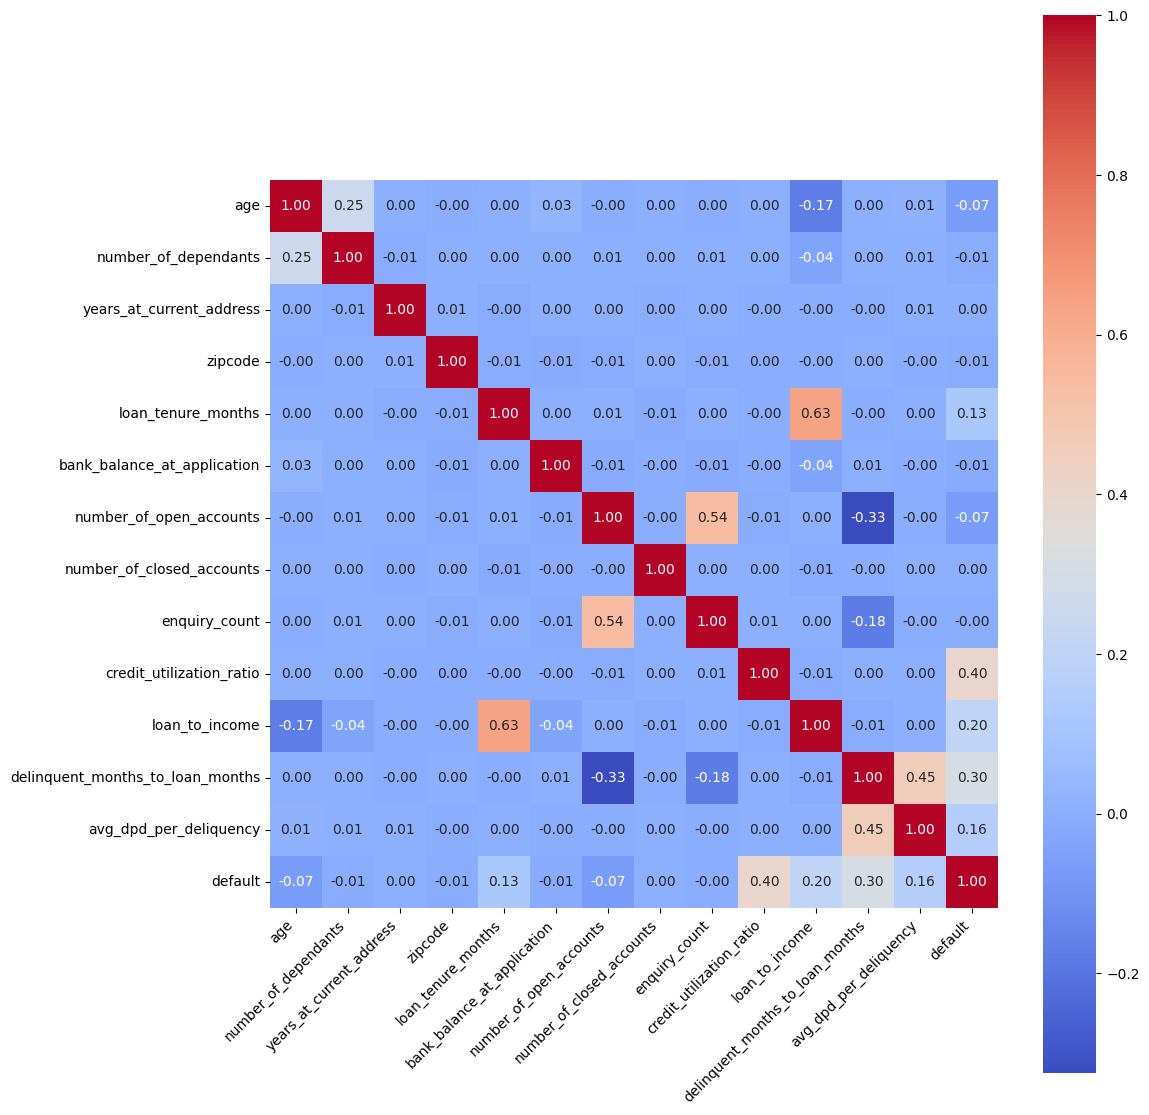

In [70]:
selected_cols = selected_numeric_vif_features_vif + ["default"]
# Ensure it's a list, then append 'default'
plt.figure(figsize=(12, 12))
cm = df_train_3[selected_cols].corr()
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 🧪 Feature Selection – Information Value (IV) & Weight of Evidence (WOE)

We calculate IV and WOE for all features to evaluate their predictive power:

- **WOE** helps transform categorical variables with respect to the target
- **IV** quantifies the strength of a feature in separating good vs. bad outcomes

🎯 Features with `IV > 0.02` are selected for modeling.


In [71]:
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [72]:
# weight of evidence and information value

### 📊 Loan Approval by Purpose

| **Purpose**              | **Proportion Approved** | **Proportion Denied** |
|--------------------------|--------------------------|-------------------------|
| Home Improvement         | 5 / 7 = **0.714**        | 1 / 6 = **0.167**       |
| Debt Consolidation       | 1 / 7 = **0.143**        | 4 / 6 = **0.667**       |
| Education                | 1 / 7 = **0.143**        | 1 / 6 = **0.167**       |
| **Total**                | **7**                    | **6**                   |


### 🔍 Weight of Evidence (WOE) & Information Value (IV) by Loan Purpose

| **Purpose**            | **Proportion Approved** | **Proportion Denied** | **WOE**   | **Information Value (IV)**             |
|------------------------|--------------------------|-------------------------|----------|----------------------------------------|
| Home Improvement       | 0.714                    | 0.167                   | 1.455    | **1.455** × (0.714 - 0.167)            |
| Debt Consolidation     | 0.143                    | 0.667                   | -1.54    | **-1.54** × (0.143 - 0.667)            |
| Education              | 0.143                    | 0.167                   | -0.154   | **-0.154** × (0.143 - 0.167)           |


if Information value < 0.02 it has very less predicitive [power]
if Information value  0.02 to 0.1 it has weak predicitive [power]
if Information value 0.1 to 0.3 it has medium predicitive [power]
if Information value 0.3 to 0.5 it has strong predicitive [power]
if Information value > 0.5 it has very strong predicitive [power]

In [73]:
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [74]:
def calculate_woe_iv(df,feature,target) :
    grouped = df.groupby(feature)[target].agg(["count","sum"])
    grouped = grouped.rename(columns={'count':'total' , 'sum':'good'})
    grouped['bad'] = grouped["total"]-grouped["good"]
    total_good = grouped["good"].sum()
    total_bad = grouped["bad"].sum()
    grouped["good_pct"] = grouped["good"] / total_good
    grouped["bad_pct"] = grouped["bad"] / total_bad
    grouped["good_pct"] = grouped["good"] / total_good
    grouped["WOE"] = np.log(grouped["good_pct"] / grouped["bad_pct"])
    grouped["IV"] = grouped["WOE"]*(grouped["good_pct"]-grouped["bad_pct"])

    grouped["WOE"] = grouped["WOE"].replace([np.inf,-np.inf],0)
    grouped["IV"] = grouped["IV"].replace([np.inf,-np.inf],0)

    total_iv = sum(grouped["IV"])
    return grouped,total_iv
    
grouped,total_iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1),"loan_purpose","default")

In [75]:
total_iv

0.39377543144164784

In [76]:
iv_values = {}
for feature in X_train_1.columns :
    if X_train_1[feature].dtype == "object" :
        _,iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1),feature,"default")
    else:
        X_binned = pd.cut(X_train_1[feature],bins=10,labels=False)
        _,iv = calculate_woe_iv(pd.concat([X_binned,y_train],axis=1),feature,"default")
    iv_values[feature] = iv
iv_values

{'age': 0.07592687127752061,
 'gender': 0.000482276463421216,
 'marital_status': 0.002196681370832318,
 'employment_status': 0.002447818101774487,
 'number_of_dependants': 0.00364589452118596,
 'residence_type': 0.2594019617563985,
 'years_at_current_address': 0.0010425363803530283,
 'city': 0.000817870465334103,
 'state': 0.0007881984519711979,
 'zipcode': 0.0007436024782513754,
 'loan_purpose': 0.39377543144164784,
 'loan_type': 0.17304705897793143,
 'loan_tenure_months': 0.2345061020297053,
 'bank_balance_at_application': 0.004242001247914225,
 'number_of_open_accounts': 0.07324250836253295,
 'number_of_closed_accounts': 0.00026280824021760536,
 'enquiry_count': 0.005484982638303533,
 'credit_utilization_ratio': 2.4228228499400095,
 'loan_to_income': 0.49156641450442823,
 'delinquent_months_to_loan_months': 0.678322540101926,
 'avg_dpd_per_deliquency': 0.4212364656282228}

In [77]:
pd.set_option("display.float_format",lambda x : '{:.3f}'.format(x))
iv_df = pd.DataFrame(list(iv_values.items()),columns=["feature","IV"])
iv_df.sort_values(by="IV",ascending=False)

,feature,IV
17,credit_utilization_ratio,2.423
19,delinquent_months_to_loan_months,0.678
18,loan_to_income,0.492
20,avg_dpd_per_deliquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [78]:
selected_features = [feature for feature,iv in iv_values.items() if iv > 0.02]
selected_features

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_months_to_loan_months',
 'avg_dpd_per_deliquency']

In [79]:
X_train_reduced = X_train_1[selected_features]
X_test_reduced = X_test_1[selected_features]

## 🔠 One-Hot Encoding – Categorical Features

We apply one-hot encoding to convert categorical variables into numerical format:

- Encoded columns: `residence_type`, `loan_purpose`, `loan_type`
- Used `drop_first=True` to avoid dummy variable trap

This is applied to both training and test sets using `pd.get_dummies()`.


In [80]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency
27434,0.519,Owned,Home,Secured,0.340,1.000,0.596,0.609,0.067,0.550
13400,0.212,Owned,Auto,Secured,0.509,0.667,0.929,0.183,0.034,0.425
883,0.615,Mortgage,Personal,Unsecured,0.245,0.333,0.838,0.084,0.169,0.557
7303,0.481,Owned,Auto,Secured,0.283,0.000,0.343,0.187,0.000,0.000
45124,0.250,Owned,Education,Secured,0.736,0.333,0.192,0.361,0.097,0.467


In [81]:
X_train_reduced_encoded = pd.get_dummies(X_train_reduced,columns=["residence_type","loan_purpose","loan_type"],drop_first=True,dtype=int)
X_train_reduced_encoded

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,1,0,0,1,0,0
13400,0.212,0.509,0.667,0.929,0.183,0.034,0.425,1,0,0,0,0,0
883,0.615,0.245,0.333,0.838,0.084,0.169,0.557,0,0,0,0,1,1
7303,0.481,0.283,0.000,0.343,0.187,0.000,0.000,1,0,0,0,0,0
45124,0.250,0.736,0.333,0.192,0.361,0.097,0.467,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.288,0.245,1.000,0.939,0.248,0.178,0.548,0,1,0,0,0,0
44732,0.288,0.113,0.667,0.232,0.248,0.000,0.000,1,0,0,0,0,0
38158,0.327,0.792,0.000,0.535,0.564,0.000,0.000,0,1,0,1,0,0
860,0.462,0.302,0.667,0.172,0.281,0.038,0.480,1,0,1,0,0,0


In [82]:
X_test_reduced_encoded = pd.get_dummies(X_test_reduced,columns=["residence_type","loan_purpose","loan_type"],drop_first=True,dtype=int)
X_test_reduced_encoded

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_months_to_loan_months,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,1,0,1,0,0,0
9427,0.288,0.623,1.000,0.859,0.689,0.000,0.000,1,0,0,1,0,0
199,0.192,0.623,1.000,0.727,0.635,0.000,0.000,1,0,0,1,0,0
12447,0.192,0.189,0.667,0.909,0.187,0.000,0.000,0,1,0,0,0,0
39489,0.654,0.377,1.000,0.535,0.169,0.132,0.525,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9771,0.462,0.038,0.333,0.192,0.119,0.167,0.686,1,0,0,0,1,1
34737,0.423,0.358,0.667,0.172,0.218,0.000,0.000,0,0,0,0,0,0
30390,0.327,0.245,0.000,0.273,0.073,0.000,0.000,0,0,0,0,1,1
6797,0.712,0.283,0.667,0.162,0.094,0.054,0.640,1,0,0,0,1,1


## 🤖 Model Training – Attempt 1

We trained and compared multiple classifiers to predict credit default:

- **Logistic Regression (baseline)** – Simple and fast
- **XGBoost** – Better recall and F1 score out of the box
- **Tuned Logistic Regression** – Used `RandomizedSearchCV` for optimal `C` and `solver`
- **Random Forest** – Quick baseline using ensemble trees
- **Tuned XGBoost** – Best performing model after hyperparameter tuning

All models were evaluated using **F1 score** and **classification report**.


1. Logistic Regression , RandomForest , XGB
2. No Handling of class imbalance

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_reduced_encoded,y_train)

y_pred = model.predict(X_test_reduced_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [84]:
# recall > 90%

In [85]:
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report

model = XGBClassifier()
model.fit(X_train_reduced_encoded,y_train)

y_pred = model.predict(X_test_reduced_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.74      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [86]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_reduced_encoded, y_train)

y_pred = model.predict(X_test_reduced_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.70      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [87]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   
}

log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='f1',
    cv=3,  
    verbose=2,
    random_state=42,  
    n_jobs=-1  
)

random_search.fit(X_train_reduced_encoded, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_reduced_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best Score: 0.762580900523437
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [88]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_reduced_encoded, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_reduced_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7957554786989354
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [89]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus = rus.fit_resample(X_train_reduced_encoded,y_train)
y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_reduced_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [91]:
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report

model = XGBClassifier()
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_reduced_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.95      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



## ⚖️ Attempt 3.1 – SMOTE Tomek + Logistic Regression

To improve both **minority class recall** and **data quality**, we used:

- **SMOTE Tomek**: Combines over-sampling (SMOTE) with Tomek link cleaning
- **Logistic Regression**: Trained on balanced data
- Future scope: Add **parameter tuning** using Optuna (not yet applied here)

Model was evaluated on the original test set using classification metrics.


In [92]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_reduced_encoded, y_train)
y_train_smt.value_counts()

default
0    34225
1    34225
Name: count, dtype: int64

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred = model.predict(X_test_reduced_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



## ⚙️ Attempt 3.2 – SMOTE Tomek + Logistic Regression + Optuna Tuning

We fine-tuned a **Logistic Regression** model using:

- **SMOTE Tomek** to balance the dataset
- **Optuna** for automated hyperparameter optimization:
  - Parameters tuned: `C`, `solver`, `tol`, `class_weight`
  - Objective: Maximize **macro F1 score** using 3-fold cross-validation

The best model was trained and evaluated on the original test set.


In [94]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [96]:
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)


study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-08-03 18:54:14,459] A new study created in memory with name: no-name-866da43e-dc17-4c59-9029-ec028feedcb2
[I 2025-08-03 18:54:14,811] Trial 0 finished with value: 0.944748933556076 and parameters: {'C': 102.16605308636862, 'solver': 'newton-cg', 'tol': 5.3216604873675e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.944748933556076.
[I 2025-08-03 18:54:15,073] Trial 1 finished with value: 0.9302556764467212 and parameters: {'C': 0.0295543131911001, 'solver': 'liblinear', 'tol': 0.0025822180107300855, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.944748933556076.
[I 2025-08-03 18:54:15,341] Trial 2 finished with value: 0.9447921397643801 and parameters: {'C': 8.40043829954483, 'solver': 'saga', 'tol': 0.0005806844693518789, 'class_weight': None}. Best is trial 2 with value: 0.9447921397643801.
[I 2025-08-03 18:54:15,694] Trial 3 finished with value: 0.944763523558259 and parameters: {'C': 302.2193275612204, 'solver': 'liblinear', 'tol': 4.242390813603

In [97]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_reduced_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9449792911874738
  Params: 
    C: 8314.675531149845
    solver: liblinear
    tol: 0.01391587861635857
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



## 🚀 Attempt 4 – XGBoost + SMOTE Tomek + Optuna

We used **XGBoost** with full hyperparameter optimization to improve predictive performance on imbalanced data:

- Applied **SMOTE Tomek** to balance training data
- Tuned 12+ hyperparameters using **Optuna** to maximize macro F1 score:
  - Key parameters: `eta`, `max_depth`, `subsample`, `scale_pos_weight`, etc.
- Final model evaluated on the original test set

This is the most advanced and optimized model in our pipeline.


In [98]:
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-08-03 18:54:26,731] A new study created in memory with name: no-name-f1b37576-1de4-43d5-9c96-958b8b8ed09d
[I 2025-08-03 18:54:27,421] Trial 0 finished with value: 0.9197201373187939 and parameters: {'lambda': 0.12128129238041153, 'alpha': 0.01701905907999996, 'subsample': 0.7251587062628866, 'colsample_bytree': 0.5150278928330669, 'max_depth': 3, 'eta': 0.07442535025915287, 'gamma': 3.7473481269224793, 'scale_pos_weight': 4.164375170438108, 'min_child_weight': 4, 'max_delta_step': 7}. Best is trial 0 with value: 0.9197201373187939.
[I 2025-08-03 18:54:28,287] Trial 1 finished with value: 0.963349224541863 and parameters: {'lambda': 0.031400943927935944, 'alpha': 0.24400834094686139, 'subsample': 0.7180580727215986, 'colsample_bytree': 0.46600854547787296, 'max_depth': 8, 'eta': 0.2235984054860724, 'gamma': 7.462095307713521, 'scale_pos_weight': 5.265948719520165, 'min_child_weight': 5, 'max_delta_step': 8}. Best is trial 1 with value: 0.963349224541863.
[I 2025-08-03 18:54:29,0

In [99]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

y_pred = best_model_xgb.predict(X_test_reduced_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9753305772164927
  Params: 
    lambda: 0.011223255084787576
    alpha: 0.2966131973532676
    subsample: 0.9462819661795558
    colsample_bytree: 0.8508759683537168
    max_depth: 9
    eta: 0.19108696543206974
    gamma: 0.738538783906649
    scale_pos_weight: 3.3548890532410773
    min_child_weight: 2
    max_delta_step: 0
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11390
           1       0.70      0.88      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.85      0.92      0.88     12498
weighted avg       0.96      0.96      0.96     12498



## ✅ Final Model Selection – Logistic Regression

After comparing all models, **Logistic Regression (tuned with Optuna)** showed the best balance between performance and interpretability.

noe further evaluating it using:
- **Classification report** for precision, recall, F1
- **ROC Curve** to visualize its discriminatory power
- **AUC (Area Under Curve)** to summarize performance across thresholds


In [100]:
y_pred = best_model_logistic.predict(X_test_reduced_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [101]:
probabilities = best_model_logistic.predict_proba(X_test_reduced_encoded)[:,1]
probabilities

array([0.00001655, 0.74960914, 0.16153818, ..., 0.00000941, 0.00000569,
       0.08507188], shape=(12498,))

In [102]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,probabilities)
fpr[:10],tpr[:10],thresholds[:10]

(array([0.        , 0.        , 0.        , 0.0000878 , 0.0000878 ,
        0.00017559, 0.00017559, 0.00026339, 0.00026339, 0.00035119]),
 array([0.        , 0.00090253, 0.20577617, 0.20577617, 0.23375451,
        0.23375451, 0.26534296, 0.26534296, 0.30144404, 0.30144404]),
 array([       inf, 0.99999977, 0.99807551, 0.99804932, 0.99734922,
        0.9973434 , 0.99619485, 0.99618245, 0.99513425, 0.995132  ]))

In [103]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9829943772325461)

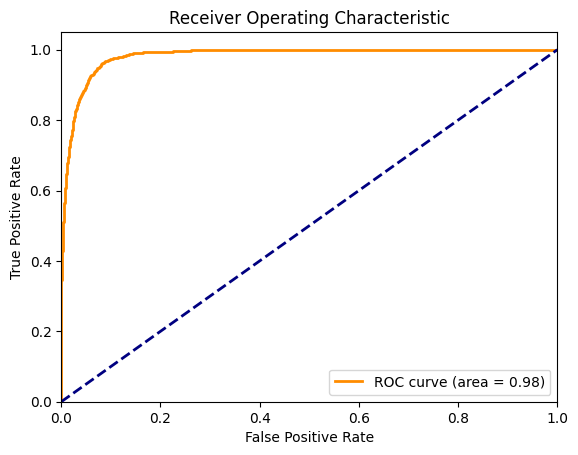

In [104]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 📈 Model Evaluation – Rank Order & KS Statistic

To evaluate **discriminatory power** of the final model beyond ROC:

### 🔹 Decile Analysis
- Test set predictions are binned into **10 probability-based deciles**
- Each decile summarizes:
  - **Event rate** (defaults)
  - **Non-event rate**
  - **Cumulative distribution** of events and non-events

### 🔹 KS Statistic (Kolmogorov-Smirnov)
- Measures separation between event and non-event distributions
- **Higher KS ⇒ better model separation**


In [105]:
probabilities = best_model_logistic.predict_proba(X_test_reduced_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.750
199,0,0.162


In [106]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.750,8
199,0,0.162,7


In [107]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\msart\AppData\Local\Temp\ipykernel_30028\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.002,0.000,1250.000
5,5,0.002,0.008,1.000,1249.000
6,6,0.008,0.044,3.000,1246.000
7,7,0.044,0.235,17.000,1233.000
8,8,0.235,0.809,170.000,1080.000
9,9,0.809,1.000,917.000,333.000


In [108]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
4,4,0.000,0.002,0.000,1250.000,0.000,100.000
5,5,0.002,0.008,1.000,1249.000,0.080,99.920
6,6,0.008,0.044,3.000,1246.000,0.240,99.760
7,7,0.044,0.235,17.000,1233.000,1.360,98.640
8,8,0.235,0.809,170.000,1080.000,13.600,86.400
9,9,0.809,1.000,917.000,333.000,73.360,26.640


In [109]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.809,1.000,917.000,333.000,73.360,26.640
1,8,0.235,0.809,170.000,1080.000,13.600,86.400
2,7,0.044,0.235,17.000,1233.000,1.360,98.640
3,6,0.008,0.044,3.000,1246.000,0.240,99.760
4,5,0.002,0.008,1.000,1249.000,0.080,99.920
5,4,0.000,0.002,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [110]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.809,1.000,917.000,333.000,73.360,26.640,917.000,333.000
1,8,0.235,0.809,170.000,1080.000,13.600,86.400,1087.000,1413.000
2,7,0.044,0.235,17.000,1233.000,1.360,98.640,1104.000,2646.000
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [111]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.809,1.000,917.000,333.000,73.360,26.640,917.000,333.000,82.762,2.924
1,8,0.235,0.809,170.000,1080.000,13.600,86.400,1087.000,1413.000,98.105,12.406
2,7,0.044,0.235,17.000,1233.000,1.360,98.640,1104.000,2646.000,99.639,23.231
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000,99.910,34.170
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [112]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.809,1.000,917.000,333.000,73.360,26.640,917.000,333.000,82.762,2.924,79.838
1,8,0.235,0.809,170.000,1080.000,13.600,86.400,1087.000,1413.000,98.105,12.406,85.699
2,7,0.044,0.235,17.000,1233.000,1.360,98.640,1104.000,2646.000,99.639,23.231,76.408
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000,99.910,34.170,65.739
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


## 📊 Decile-Wise Evaluation – KS Statistic

We group test predictions into **deciles (9 → 0)** based on default probability and compute the **Kolmogorov-Smirnov (KS)** statistic to assess model separation.

> 🔹 **Decile 9** = Highest risk (most likely to default)  
> 🔹 **KS** = Max difference between cumulative event and non-event rates

---

### 🔍 Key Observations

- **Decile 9**  
  - 🔸 Highest risk: Event Rate = 73.4%  
  - 🔸 KS = 79.9%

- **Decile 8**  
  - 🔸 Moderate Events, strong separation  
  - 🔸 **Max KS = 85.6%**

- **Decile 7 → 4**  
  - 🔸 Rapid drop in event rate (e.g. 1.5%, 0.16%)  
  - 🔸 KS falls gradually (~76% to ~43%)

- **Decile 3 → 0**  
  - 🔸 Almost no events  
  - 🔸 KS drops to 0% → model is confident about non-defaults

---

### ✅ Summary

- 📈 **Max KS = 85.6%** in decile **8** → excellent discriminatory power  
- 🔼 Higher deciles (9–7): capture majority of defaults  
- 🔽 Lower deciles (3–0): contain mostly non-events  
- 🎯 Model shows strong rank ordering and separation between classes


## 🧠 Final Model: Logistic Regression

### 🔍 Feature Importance  
- Plotted bar chart of coefficients from the logistic regression model.  
- Shows which features contribute most positively or negatively toward default prediction.

### 🧪 Model Parameters  
- Printed model coefficients and intercept to verify learned weights.  
- Confirmed that features and scaled columns are aligned correctly.

### 📦 Model Artifact Validation  
- Loaded serialized model data (`model_data.joblib`).  
- Confirmed presence of both the trained model and fitted scaler.  
- Validated the scaler object is properly initialized and ready for use.


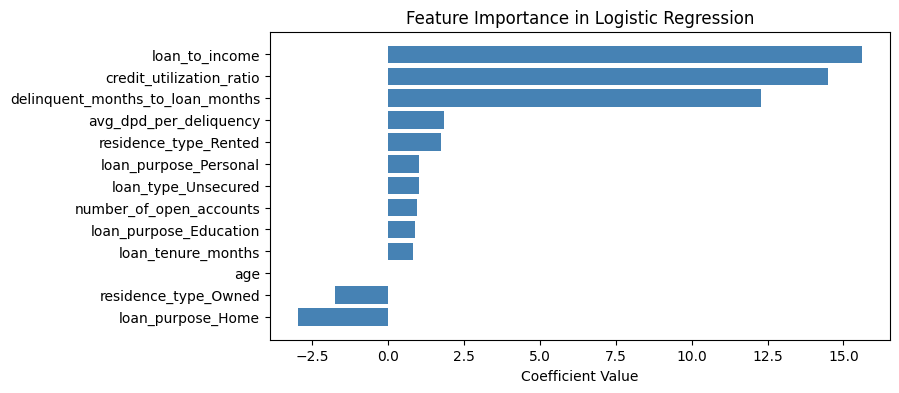

In [114]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance, index=X_train_reduced_encoded.columns, columns=['Coefficients'])

coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [115]:
X_test_reduced_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income',
       'delinquent_months_to_loan_months', 'avg_dpd_per_deliquency',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [116]:
cols_to_scale

['age',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_months_to_loan_months',
 'avg_dpd_per_deliquency']

In [117]:
X_train_reduced_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income',
       'delinquent_months_to_loan_months', 'avg_dpd_per_deliquency',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [118]:
final_model

LogisticRegression(C=8314.675531149845, class_weight='balanced',
                   solver='liblinear', tol=0.01391587861635857)

In [ ]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_test_reduced_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, '../artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [ ]:
final_model.coef_, final_model.intercept_

(array([[-0.00985031,  0.8213719 ,  0.96473872, 14.49802517, 15.60448042,
         12.29624644,  1.83863723, -1.73585386,  1.7330743 ,  0.89375497,
         -2.95471407,  1.00970977,  1.00970977]]),
 array([-18.87808867]))

In [ ]:
import joblib
model_data = joblib.load("../artifacts/model_data.joblib")
print(model_data.keys())
print(type(model_data['scaler']))
print(model_data['scaler'].min_)  # Check if fitted

dict_keys(['model', 'features', 'scaler', 'cols_to_scale'])
<class 'sklearn.preprocessing._data.MinMaxScaler'>
[-0.34615385  0.         -0.03333333 -0.00136266 -0.00105005 -0.00105005
 -0.00105005 -0.11320755 -0.00725201 -0.00248044 -0.33333333  0.
 -0.125       0.         -0.07025761  0.          0.        ]
